# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. No need to implement any code.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

*Answer:*   
Here I define a decision function  $\begin{equation}
\phi (z)=\left\{
\begin{array}{rcl}
1 & & {if z \ge \theta}\\
-1 & & {otherwise}
\end{array} \right.
\end{equation}$  
where I set threshold $\theta$ as 0.  
So the outputs of the given inputs are calculated as following  
$z^{(0)}=1*0+1*0+(-1.5)*1=-1.5$   
$z^{(1)}=1*1+1*0+(-1.5)*1=-0.5$   
$z^{(2)}=1*0+1*1+(-1.5)*1=-0.5$   
$z^{(3)}=1*1+1*1+(-1.5)*1=0.5$   
$output^{(0)}=\phi(z^{(0)})=-1$  
$output^{(1)}=\phi(z^{(1)})=-1$  
$output^{(2)}=\phi(z^{(2)})=-1$  
$output^{(3)}=\phi(z^{(3)})=1$ 


### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


*Answer:*    
Here I define the decision function $\begin{equation}
\phi (z)=\left\{
\begin{array}{rcl}
1 & & {if z \ge \theta}\\
-1 & & {otherwise}
\end{array} \right.
\end{equation}$  

**AND**: let the weights of perceptron be $w_1=0.5$ and $w_2=0.5$, let the bias be $w_0=-0.7$ and let therashold $\theta=0$  
**NOT**: because this logical function only need one input, so let the weights of perceptron be $w_1=1$ and , let the bias be $w_0=-0.5$ and let therashold be $\theta=0$  
**NAND**: let the weights of perceptron be $w_1=-0.5$ and $w_2=-0.5$, let the bias be $w_0=0.7$ and let therashold be $\theta=0$  
**NOR**: let the weights of perceptron be $w_1=-1$ and $w_2=-1$, let the bias be $w_0=0.5$ and let therashold be $\theta=0$  

### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


*Answer:*  
This problem cannot be learned by a perceptron.  
Because I list the truth table of this problem and visulize it. Then we can find that the two classes are not linearly separable. So the convergence of the perceptron cannot be graranteed.

### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Answer:*  
I use matplotlib library to plot the given points as following figure. And the green line represents the optimal separating line.  
The support vectors are (0,1),(1,0),(1,1).  
The distance between support vectors and the optimal hyperplane is the cloest. And the support vectors decide the parameters of the optimal hyperplane.

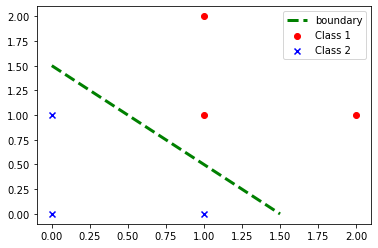

In [48]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1,1],[1,2],[2,1],[0,0],[1,0],[0,1]])
plt.scatter(X[:3,0], X[:3,1], color='red', marker='o', label='Class 1')
plt.scatter(X[3:,0], X[3:,1], color='blue', marker='x', label='Class 2')
x = np.linspace(0,1.5,5)
y = -x+1.5
plt.plot(x,y,color='green', linestyle='--', linewidth=3, label='boundary')
plt.legend(loc='upper right')
plt.show()

### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


In [44]:
import math
p_list = [0.5, 0.125, 0.125, 0.125, 0.125]
def entropy(p_list):
    entropy = 0
    for p in p_list:
        entropy += p * math.log(p,2)
    entropy = -entropy
    print("entropy is", entropy)
    return entropy
entropy = entropy(p_list)

entropy is 2.0


### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

*Answer:*  
Here I define the logical AND function: A AND B.   
On the root node, I split the data according to "A == True"
1. Left node(A != True):  the labels of data on left node are all False.
2. Right node(A == True): then split the data according to "B == True"  
    2.1. Left node(B != True): the labels of data on left node are all False.  
    2.2. Right node(B == True): the labels of data on right node are all True.  

Perceptron needs to update weights vectors until convergence during training. While decision tree just makes a test to classify the data with different features.

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


*Answer:*   
First of all, calculate the gini impurity of the data on the root node:  
$I_G(D_{root}) = 1-[(\frac{3}{8})^2+(\frac{5}{8})^2]=0.46875$  
1. Here I split the data according to each feature, then calculate the information gain:  
    - if choose the feature "Height" to split the root node  
        - Height == Tall: $I_G(D_{left}) = 1-[(\frac{2}{5})^2+(\frac{3}{5})^2]=0.48$   
        - Height == Small: $I_G(D_{right}) = 1-[(\frac{1}{3})^2+(\frac{2}{3})^2]=0.4444$  
        - $IG_{height} = I_G(D_{root})-\frac{5}{8}*I_G(D_{left})-\frac{3}{8}*I_G(D_{right})=0.0021$  
    - if choose the feature "Hair" to split the root node  
        - Hair == Blonde: $I_G(D_{left}) = 1-[(\frac{1}{2})^2+(\frac{1}{2})^2]=0.5$  
        - Hair == Dark: $I_G(D_{middle}) = 1-1=0$  
        - Hair == Red: $I_G(D_{right}) = 1-1=0$
        - $IG_{hair} = I_G(D_{root})-\frac{1}{2}*I_G(D_{left})-\frac{3}{8}*I_G(D_{middle})-\frac{1}{8}*I_G(D_{right})=0.21875$  
    - if choose "Eyes == Blue" to split the root node   
        - $I_G(D_{left}) = 1-[(\frac{3}{5})^2+(\frac{2}{5})^2]=0.48$  
        - $I_G(D_{right}) = 1 - 1=0$  
        - $IG_{eyes} = I_G(D_{root})-\frac{5}{8}*I_G(D_{left})-\frac{3}{8}*I_G(D_{right})=0.16875$  
    In order to maximize the information gain, I choose feature "Hair" to split data on the root node.  
2. Then continue spliting the data which "Hair == Blonde" on the left node to maximize the information gain:
    - if choose the feature "Height" to split the left node  
        - $I_G(D_{left}) = 1-[(\frac{1}{2})^2+(\frac{1}{2})^2]=0.5$  
        - $I_G(D_{right}) = 1-[(\frac{1}{2})^2+(\frac{1}{2})^2]=0.5$  
        - $IG_{height} = I_G(D_{eyes})-\frac{1}{2}*I_G(D_{left})-\frac{1}{2}*I_G(D_{right})=0$  
    - if choose the feature "Eyes" to split the left node  
        - $I_G(D_{left}) = 1-1=0$  
        - $I_G(D_{right}) = 1-1=0$  
        - $IG_{hair} = I_G(D_{eyes})-\frac{2}{5}*I_G(D_{left})-\frac{3}{5}*I_G(D_{right})=0.5$   
    In order to maxmize the information gain, I choose the feature "Eyes" to split data on the left node.  
    
 In conclusion, people with blue eyes but not dark hair are attractive.

### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

**Q1**  
$probability = \phi(w_1*x_1+w_2*x_2+w_0*1) = \phi(0.05*40+1*3.5-6) = \frac{1}{1+e^{0.5}}=0.37754$  
So the probability is about 37.75%.  
**Q2**  
$probability = \phi(w_1*x_1+w_2*x_2+w_0*1) = \phi(0.05*x_1+1*3.5-6) = \frac{1}{1+e^{-0.05*x_1+2.5}}= 0.5$  
So we can solve this equation and get the hours studies $x_1=50$,

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Answer:*  
For KNN with k=1, the training error rate is 0 for all the training data will be classified correctly. However, this KNN model has an average error rate of 18% wich implies a test error rate of 36% on test sets. So we should choose the First classification procedure with logistic regression because the test error rate is less than that of KNN.

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Answer:*  
The Gradient Descent suffers from features of different scales.  
If the features in training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge.  
To solve this problem, we can use Batch Normalization to scale the training data or just use Normal Equation without scaling.

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Answer:*  
1. Increase the number of estimators(base decision trees).
2. Reduce the regularization hyperparameters of the base estimator.
3. Increasing the learning rate slightly.

### A12

What is the benefit of out-of-bag evaluation?

*Answer:*  
Out-of-bag evaluation allows each predictor in a bagging ensemble to be evaluated using instances that it was not trained on (the remaining instances after bootstrap selecting). This makes it possible to have a fairly unbiased evaluation of the ensemble without an additional validation set. Thus, we can have more instances available for training to make our model slightly better.

### A13

What is the difference between hard and soft voting classifiers?

*Answer:*  
A hard voting classifier just counts the votes of each classifier in the ensemble and picks the class that gets the most votes.
A soft voting classifier computes the average estimated class probability for each class then picks the class with the highest probability.

## Part B: Applied Questions

Solve the following questions implementing solutions in code.

### B1
Consider the following Perceptron code.

In [66]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [67]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


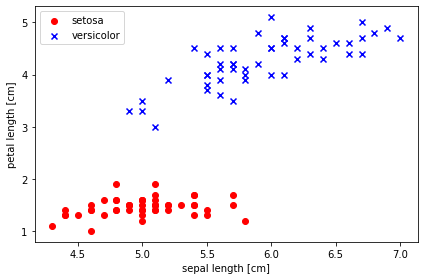

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [69]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [70]:
from matplotlib.colors import ListedColormap

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [71]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    # boundary is: w1*x1+w2*x2+w0=0
    x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    w=classifier.w_
    x2_interval = [-(w[0]+w[1]*x1_interval[0])/w[2], -(w[0]+w[1]*x1_interval[1])/w[2]]
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

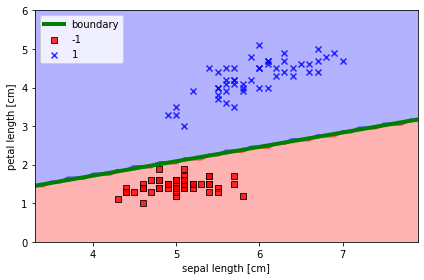

In [72]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [73]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


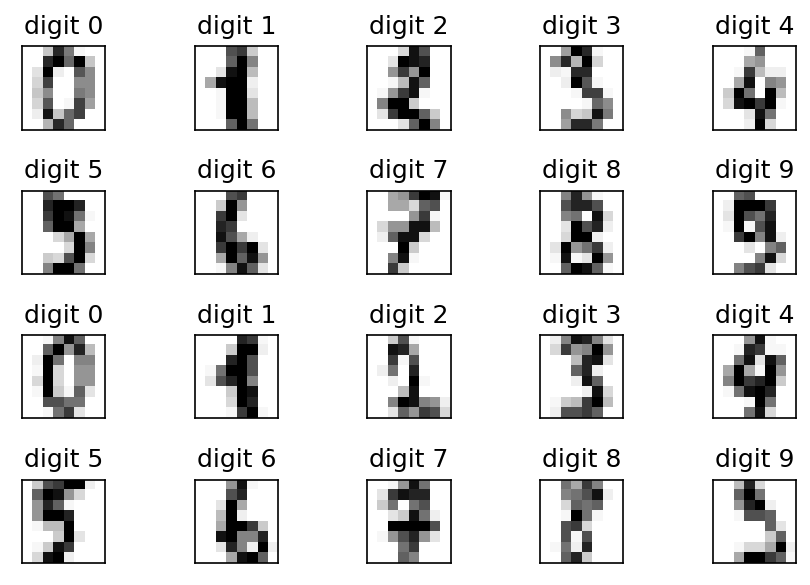

In [74]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [75]:
#Your code comes here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(y_train.shape, y_test.shape)

(1257,) (540,)


Classifier #1 Perceptron

In [82]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=50, tol=1e-3, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % ppn.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Train Accuracy: 0.97
Test Accuracy: 0.94


Classifier #2 Logistic Regression

In [85]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr', random_state=1)
lr.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % lr.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % lr.score(X_test_std, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.96


Classifier #3 SVM

In [86]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, gamma=0.02, random_state=1)
svm.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % svm.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % svm.score(X_test_std, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.99


Classifier #4 Decision Tree

In [87]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
tree.fit(X_train, y_train)

print('Train Accuracy: %.2f' % tree.score(X_train, y_train))
print('Test Accuracy: %.2f' % tree.score(X_test, y_test))

Train Accuracy: 0.98
Test Accuracy: 0.84


Classifer #5 Random Forest

In [94]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=30, random_state=1, n_jobs=4)
forest.fit(X_train, y_train)

print('Train Accuracy: %.2f' % forest.score(X_train, y_train))
print('Test Accuracy: %.2f' % forest.score(X_test, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.97


Classifier #6 KNN

In [101]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % knn.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % knn.score(X_test_std, y_test))

Train Accuracy: 0.98
Test Accuracy: 0.99


So **SVM** performs best, **Decision Tree** performs worst.  
Because both the train accuracy and test accuracy of SVM are best among these classifiers. While the test accuracy of Decision Tree is worst.

### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

**Download and unzip the dataset**

In [107]:
#Your answer here
import os
from urllib.request import urlretrieve
import shutil
import tarfile

DATASET_DIR = 'data'
SPAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2'
EASY_HAM_URL = 'https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2'
TAR_DIR = os.path.join(DATASET_DIR, 'tar')
if not os.path.isdir(TAR_DIR):
    os.makedirs(TAR_DIR)
    
    
def download_data(url):
    
    filename = url.rsplit('/', 1)[-1]
    filepath = os.path.join(TAR_DIR, filename)
    
    urlretrieve(url, filepath)
    with tarfile.open(filepath) as tar:
        dirname = os.path.join(DATASET_DIR, tar.getnames()[0])
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path=DATASET_DIR) # unzip tar file
        
        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)
    
    return dirname

In [108]:
spam_dir = download_data(SPAM_URL)
easy_ham_dir = download_data(EASY_HAM_URL)

**Split the datasets into a training set and a test set**

In [110]:
import numpy as np
import glob

def load_data(dirpath):
    
    files = []
    glob_path = os.path.join(dirpath, '*')
    filepaths = glob.glob(glob_path)
    for path in filepaths:
        with open(path, 'rb') as f:
            byte_content = f.read()
            str_content = byte_content.decode('utf-8', errors='ignore')
            files.append(str_content)
    return files

spam = load_data(spam_dir)
easy_ham = load_data(easy_ham_dir)

In [115]:
print(len(spam),len(easy_ham))

1396 2500


In [117]:
easy_ham[0]

'From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002\nReturn-Path: <exmh-workers-admin@spamassassin.taint.org>\nDelivered-To: zzzz@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36\n\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)\nReceived: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for\n    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100\nReceived: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by\n    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002\n    07:35:02 -0400 (EDT)\nDelivered-To: exmh-workers@listman.spamassassin.taint.org\nReceiv

In [114]:
import sklearn.utils
from sklearn.model_selection import train_test_split

X = spam + easy_ham
y = np.concatenate((np.ones(len(spam)), np.zeros(len(easy_ham))))  #create labels

# shuffle the dataset
X, y = sklearn.utils.shuffle(X, y, random_state=1)
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

print("len(X_train):", len(X_train))
print("len(y_train):", len(y_train))
print("len(X_test):", len(X_test))
print("len(y_test):", len(y_test))

len(X_train): 3116
len(y_train): 3116
len(X_test): 780
len(y_test): 780


In [118]:
spam[0]

'From ilug-admin@linux.ie  Tue Aug  6 11:51:02 2002\nReturn-Path: <ilug-admin@linux.ie>\nDelivered-To: yyyy@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 9E1F5441DD\n\tfor <jm@localhost>; Tue,  6 Aug 2002 06:48:09 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Tue, 06 Aug 2002 11:48:09 +0100 (IST)\nReceived: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g72LqWv13294 for\n    <jm-ilug@jmason.org>; Fri, 2 Aug 2002 22:52:32 +0100\nReceived: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org\n    (8.9.3/8.9.3) with ESMTP id WAA31224; Fri, 2 Aug 2002 22:50:17 +0100\nReceived: from bettyjagessar.com (w142.z064000057.nyc-ny.dsl.cnc.net\n    [64.0.57.142]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id WAA31201 for\n    <ilug@linux.ie>; Fri, 2 Aug 2002 

**Data preparation pipeline**

In [120]:
import re
import string
def filter_header(str):
    index = str.index('\n\n')
    return str[index:]

def filter_urls(words):
    for i, word in enumerate(words):
        if re.match("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|""[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", word):
            words[i]='URL'
    return words

def filter_num(words):
    for i, word in enumerate(words):
        if word.isdigit():
            words[i] = 'NUM'
    return words

def filter_punctuation(str):    
    # new_str = ''.join(l for l in str if l not in string.punctuation)
    new_str = ''
    for l in str:
        if l.isalnum() or l.isspace():
            new_str += l
    return new_str

In [123]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

class EmailsClean(BaseEstimator, TransformerMixin):
    def __init__(self, filter_header=True, to_lowercase=True, filter_urls=True, filter_num=True, filter_punctuation=True):
        self.filter_header = filter_header
        self.to_lowercase = to_lowercase
        self.filter_urls = filter_urls
        self.filter_num = filter_num
        self.filter_punctuation = filter_punctuation
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        X_cleaned = []
        for email in X:
            if self.filter_header:
                email = filter_header(email)
            if self.to_lowercase:
                email = email.lower()
            
            email_words = email.split()
            if self.filter_urls:
                email_words = filter_urls(email_words)
            if self.filter_num:
                email_words = filter_num(email_words)
            email = ' '.join(email_words)
            if self.filter_punctuation:
                email = filter_punctuation(email)
            X_cleaned.append(email)
        return X_cleaned
    
# build data preparation pipeline
preparation_pipeline = Pipeline([
    ('clean_email', EmailsClean()),
    ('bag_of_words', CountVectorizer())  # use bag of words
])

In [127]:
X_train_final = preparation_pipeline.fit_transform(X_train)
print("X_train_final:",X_train_final.shape)

X_train_final: (3116, 74238)


**Train and Evaluate models**

In [131]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

classifiers = {
    'SVM': SVC(),
    'SGD': SGDClassifier(max_iter=100, random_state=2),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting Decision Trees': GradientBoostingClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(16,))
}


In [133]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

y_preds = {}
for name, clf in classifiers.items():
    y_preds[name] = cross_val_predict(clf, X_train_final, y_train, cv=5)

for name, y_pred in y_preds.items():
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    print(name+':')
    print("precision:",precision)
    print("recall:", recall)
    print("f1:", f1)

SVM:
precision: 0.9771490750816104
recall: 0.8039391226499553
f1: 0.8821218074656187
SGD:
precision: 0.9800543970988214
recall: 0.9677708146821844
f1: 0.9738738738738738
Decision Tree:
precision: 0.9353369763205829
recall: 0.9194270367054611
f1: 0.9273137697516929
Random Forest:
precision: 0.992467043314501
recall: 0.9435989256938228
f1: 0.9674162459843966
AdaBoost:
precision: 0.9790337283500455
recall: 0.9615040286481648
f1: 0.970189701897019
Gradient Boosting Decision Trees:
precision: 0.9806629834254144
recall: 0.9534467323187108
f1: 0.9668633681343622
MLP:
precision: 0.9972118959107806
recall: 0.9606087735004476
f1: 0.9785681714546284


In [136]:
# test
X_test_final = preparation_pipeline.transform(X_test)

svm_clf = SVC()
sgd_clf = SGDClassifier(max_iter=100, random_state=2)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adaboost_clf = AdaBoostClassifier()
gbdt_clf = GradientBoostingClassifier()
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,))

test_classifiers = {
    'SVM': svm_clf,
    'SGD': sgd_clf,
    'Decision Tree': tree_clf,
    'Random Forest': rf_clf,
    'AdaBoost': adaboost_clf,
    'Gradient Boosting Decision Trees': gbdt_clf,
    'MLP': mlp_clf
}
for name, clf in classifiers.items():
    clf.fit(X_train_final, y_train)
    y_pred = clf.predict(X_test_final)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(name+':')
    print("precision:",precision)
    print("recall:", recall)
    print("f1:", f1)
    print()

SVM:
precision: 0.9914163090128756
recall: 0.8279569892473119
f1: 0.90234375

SGD:
precision: 0.9891304347826086
recall: 0.978494623655914
f1: 0.9837837837837837

Decision Tree:
precision: 0.9326241134751773
recall: 0.942652329749104
f1: 0.9376114081996434

Random Forest:
precision: 0.996268656716418
recall: 0.956989247311828
f1: 0.9762340036563072

AdaBoost:
precision: 0.9747292418772563
recall: 0.967741935483871
f1: 0.9712230215827338

Gradient Boosting Decision Trees:
precision: 0.9744525547445255
recall: 0.956989247311828
f1: 0.9656419529837252

MLP:
precision: 1.0
recall: 0.96415770609319
f1: 0.9817518248175183



So the MLP model is the best among above classifiers for its f1 score is the highest.